In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Reading in the data
df = pd.read_csv(r'C:\Users\TEGS D GR8\Downloads\movies.csv')

In [30]:
# looking a the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [17]:
#looping for missing data

for col in df.columns:
   pct_missing = np.mean(df[col].isnull())
   print('{} - {}%'. format(col,round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [20]:
# Data types for column
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [22]:
# changing data type for dome columnx to eliminate decimals
df['budget'] = df['budget'].apply("int64")

In [24]:
df['budget'] = df['budget'].fillna(0) 

In [26]:
df['budget'] = df['budget'].astype('int64')

In [27]:
df['budget'] = df['budget'].apply("int64")

In [29]:
df['gross'] = df['gross'].apply("int64")
df['runtime'] = df['runtime'].apply("int64")
df['votes'] = df['votes'].apply("int64")

In [148]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,0
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,0
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,0
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,0
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,0


In [155]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38


In [58]:
pd.set_option('display.max_rows', None)

In [60]:
Newdf = df.dropna(axis=0) 

In [61]:
print(Newdf.isnull().sum(),'\n')

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64 



In [76]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [156]:
# drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,0
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,0
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,0
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,0
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,0


In [116]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:xlabel='budget', ylabel='gross'>

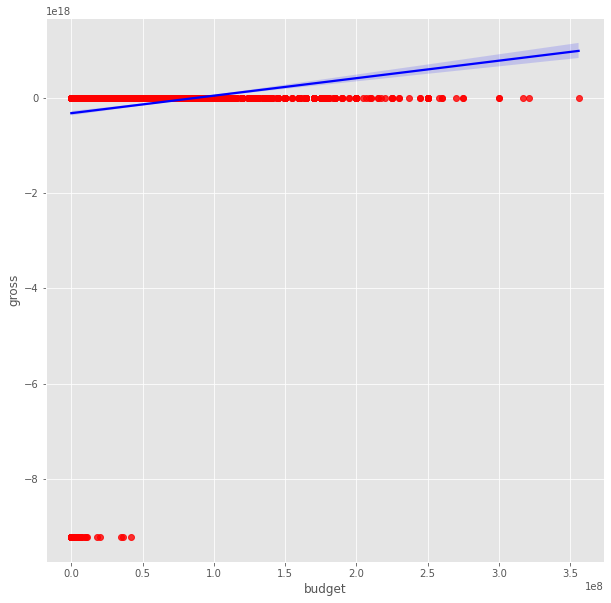

In [147]:
#plotting the budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

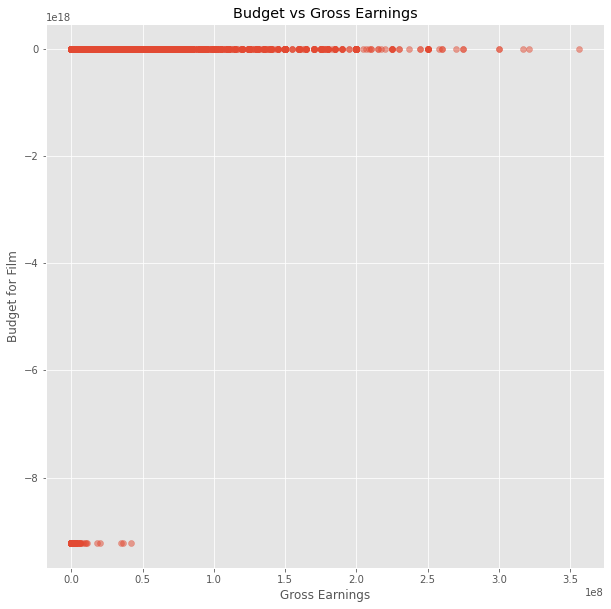

In [120]:
# scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [132]:
# looking at correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,-0.034758,0.309212,0.142282,-0.025799
score,0.097995,1.000000,0.409182,0.055665,0.054626,0.018643
votes,-0.034758,0.409182,1.000000,0.012906,0.124450,-0.000452
budget,0.309212,0.055665,0.012906,1.000000,0.099112,0.009176
gross,0.142282,0.054626,0.124450,0.099112,1.000000,0.106876
runtime,-0.025799,0.018643,-0.000452,0.009176,0.106876,1.000000


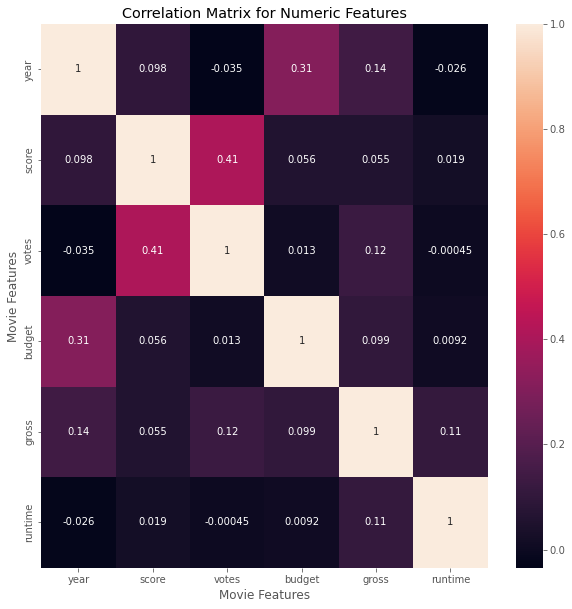

In [136]:
correlation_matrix = df.corr('pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [137]:
#looking at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [151]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
      

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,0
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,0
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,0
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,0
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,0


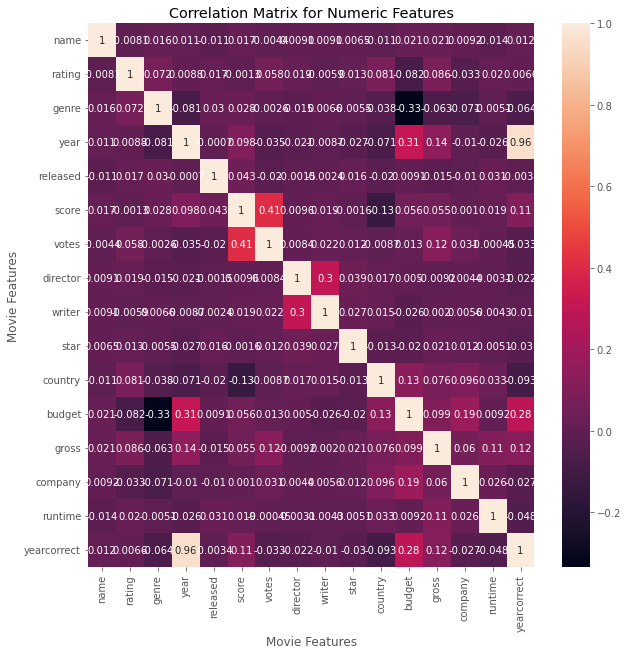

In [140]:
correlation_matrix = df_numerized.corr('pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [141]:
df_numerized.corr('pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,-0.004443,0.009079,0.009081,0.006472,-0.010737,0.020548,0.020733,0.009211,-0.013912,0.011711
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.057897,0.019483,-0.005921,0.013405,0.081244,-0.081939,0.086097,-0.032943,0.019997,0.006560
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.002630,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.062893,-0.071067,-0.005107,-0.064337
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,-0.034758,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.142282,-0.010431,-0.025799,0.962250
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,-0.020144,-0.001478,-0.002404,0.015777,-0.020427,0.009145,-0.015010,-0.010474,0.030539,-0.003433
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.054626,0.001030,0.018643,0.106582
votes,-0.004443,0.057897,-0.002630,-0.034758,-0.020144,0.409182,1.000000,0.008424,0.022036,0.012131,-0.008687,0.012906,0.124450,0.031384,-0.000452,-0.033446
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.008424,1.000000,0.299067,0.039234,0.017490,0.004976,-0.009215,0.004404,-0.003139,-0.021652
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.022036,0.299067,1.000000,0.027245,0.015343,-0.025911,0.002010,0.005646,-0.004254,-0.010438
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,0.012131,0.039234,0.027245,1.000000,-0.012998,-0.019952,0.020839,0.012442,-0.005090,-0.030390


In [152]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [154]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget       genre     -0.334021
genre        budget    -0.334021
country      score     -0.133348
score        country   -0.133348
yearcorrect  country   -0.092522
dtype: float64

In [153]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

year         yearcorrect    0.96225
yearcorrect  year           0.96225
name         name           1.00000
company      company        1.00000
gross        gross          1.00000
budget       budget         1.00000
country      country        1.00000
star         star           1.00000
writer       writer         1.00000
director     director       1.00000
votes        votes          1.00000
score        score          1.00000
released     released       1.00000
year         year           1.00000
genre        genre          1.00000
rating       rating         1.00000
runtime      runtime        1.00000
yearcorrect  yearcorrect    1.00000
dtype: float64